In [39]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import numpy as np
import cv2
from imutils.convenience import resize
from skimage.transform import pyramid_gaussian

In [3]:
def pyramid(image, scale=1.5, minSize=(30, 30)):
	# yield the original image
	yield image
 
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = resize(image, width=w)
 
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
 
		# yield the next image in the pyramid
		yield image

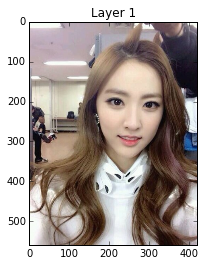

In [37]:
# load the image
image = cv2.imread("./data/hr.jpeg")

# METHOD #1: No smooth, just scaling.
# loop over the image pyramid
# plt.figure(figsize=(14,10))
for (i, resized) in enumerate(pyramid(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), scale=1.5)):
    # show the resized image
#     fig.add_subplot()
    plt.subplot()
    plt.imshow(resized)
    plt.title("Layer {}".format(i + 1))
    break

In [40]:
# METHOD #2: Resizing + Gaussian smoothing.
for (i, resized) in enumerate(pyramid_gaussian(image, downscale=2)):
    # if the image is too small, break from the loop
    if resized.shape[0] < 30 or resized.shape[1] < 30:
        break

    # show the resized image
    cv2.imshow("Layer {}".format(i + 1), resized)
    cv2.waitKey(0)